<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* GridSearchCV
* Retention

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# GridSearchCV

In [4]:
X = pd.DataFrame(skd.load_diabetes()['data'], columns = skd.load_diabetes()['feature_names'])
y = skd.load_diabetes()['target']

In [5]:
X.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [7]:
x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size = .7)

In [16]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
fit_gb = GradientBoostingRegressor().fit(x_tr, y_tr)

In [17]:
pred_rf = fit_rf.predict(x_te)
pred_gb = fit_gb.predict(x_te)

In [19]:
mean_squared_error(y_te, pred_rf)** 0.5, mean_squared_error(y_te, pred_gb)** 0.5

(56.803177800812136, 56.85425784396034)

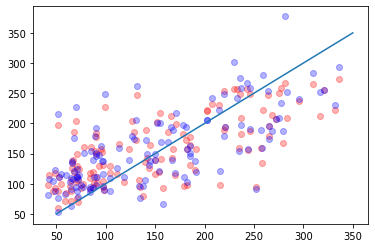

In [22]:
plt.plot(y_te, pred_rf, 'o', color = 'red', alpha = .3)
plt.plot(y_te, pred_gb, 'o', color = 'blue', alpha = .3)
plt.plot([50,350], [50,350])

In [23]:
fit_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
fit_gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [26]:
param_rf = {'n_estimators' : [100, 200],
            'min_samples_leaf' : [1,2,4,8],
            'min_samples_split' : [2,4,8,12]
            }
param_gb = {'n_estimators' : [100, 200],
            'min_samples_leaf' : [1,2,4,8],
            'min_samples_split' : [2,4,8,12],
            'max_depth' : [3, 4, 8]
            }

In [41]:
grid_rf = GridSearchCV(fit_rf, param_grid=param_rf, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 1)
grid_gb = GridSearchCV(fit_gb, param_grid=param_rf, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 1)

In [42]:
grid_rf.fit(x_tr, y_tr)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8, 12],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [43]:
grid_gb.fit(x_tr, y_tr)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8, 12],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [44]:
grid_rf.best_params_

{'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 200}

In [45]:
grid_gb.best_params_

{'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}

In [50]:
fit_rf_best = RandomForestRegressor(min_samples_leaf = 8,
                                    min_samples_split = 12,
                                    n_estimators = 200
                                    ).fit(x_tr, y_tr)
fit_gb_best = GradientBoostingRegressor(min_samples_leaf = 8,
                                        min_samples_split = 8,
                                        n_estimators = 100
                                        ).fit(x_tr, y_tr)

In [51]:
pred_rf_best = fit_rf_best.predict(x_te)
pred_gb_best = fit_gb_best.predict(x_te)

In [68]:
rmse = [mean_squared_error(y_te, pred_rf)** 0.5, mean_squared_error(y_te, pred_gb)** 0.5,
                             mean_squared_error(y_te, pred_rf_best)** 0.5, 
                             mean_squared_error(y_te, pred_gb_best)** 0.5]

In [81]:
res_tbl = pd.DataFrame(np.c_[np.array(['rf', 'gb', 'rf_best', 'gb_best']).reshape(-1,1), 
                   np.array(rmse).reshape(-1,1)],
             columns = ['type', 'rmse'])
res_tbl.rmse = res_tbl.rmse.astype(float)
res_tbl

,type,rmse
0,rf,56.803178
1,gb,56.854258
2,rf_best,55.625160
3,gb_best,56.726616


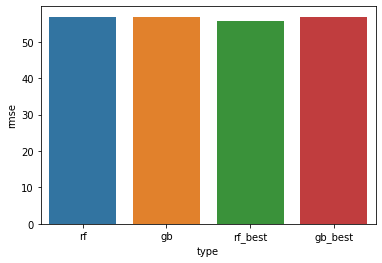

In [83]:
sns.barplot(data = res_tbl, x = 'type', y = 'rmse')

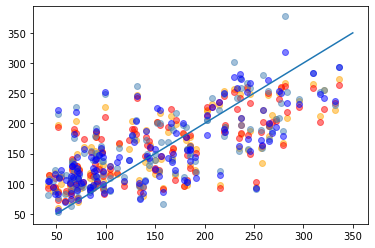

In [54]:
plt.plot(y_te, pred_rf, 'o', color = 'orange', alpha = .5)
plt.plot(y_te, pred_rf_best, 'o', color = 'red', alpha = .5)
plt.plot(y_te, pred_gb, 'o', color = 'steelblue', alpha = .5)
plt.plot(y_te, pred_gb_best, 'o', color = 'blue', alpha = .5)
plt.plot([50,350], [50,350])

# Retention

In [84]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ecommerce-data.csv',
 'sample_data']

In [90]:
pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [88]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [105]:
df.columns = df.iloc[0, :]
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [108]:
df = df.drop(df.index[0], axis = 0)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.1+ MB


In [111]:
df.transaction_date = pd.to_datetime(df.transaction_date)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [115]:
df = df[(df.order_status) == 'Approved']
df = df.assign(month = df.transaction_date.to_numpy().astype('datetime64[M]'))
df = df[['customer_id', 'month', 'transaction_date']].sort_values(['customer_id', 'transaction_date'],
                                                                  ascending = [1, 1]
                                                                  )
df.head()

,customer_id,month,transaction_date
9785,1,2017-01-01,2017-01-05
13424,1,2017-02-01,2017-02-21
14486,1,2017-03-01,2017-03-27
18970,1,2017-03-01,2017-03-29
3765,1,2017-04-01,2017-04-06


In [120]:
list_pu = df.groupby(['customer_id', 'month']).first().reset_index()
list_npu = df.groupby(['customer_id']).first().reset_index()

In [125]:
list_month = list_pu['month'].unique().astype('datetime64[D]')

In [141]:
mon = list_month[0]
temp_npu = list_npu[list_npu['month'] == mon]
temp_pu = list_pu[list_pu['customer_id'].isin(temp_npu['customer_id'])]
temp_cnt = temp_pu.groupby(['month'])['customer_id'].count().reset_index()
temp_cnt.insert(0, 'npu_month', mon)
temp_cnt = temp_cnt.assign(month_num = [f'm{a:02d}' for a in range(1,len(temp_cnt) +1)])
temp = pd.pivot_table(temp_cnt, index = 'npu_month', columns = 'month_num', values = 'customer_id').reset_index()
temp.columns.name = None
temp

,npu_month,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,2017-01-01,1347,483,505,499,492,475,513,524,489,524,492,510


In [147]:
for mon in list_month :

  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['customer_id'].isin(temp_npu['customer_id'])]
  temp_cnt = temp_pu.groupby(['month'])['customer_id'].count().reset_index()
  temp_cnt.insert(0, 'npu_month', mon)
  temp_cnt = temp_cnt.assign(month_num = [f'm{a:02d}' for a in range(1,len(temp_cnt) +1)])
  temp = pd.pivot_table(temp_cnt, index = 'npu_month', columns = 'month_num', values = 'customer_id').reset_index()
  temp.columns.name = None
  
  if mon == list_month[0] :

    res = temp
  
  else : 

    res = pd.concat([res, temp], axis = 0)

res = res.sort_values(['npu_month'])
res


,npu_month,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,2017-01-01,1347,483.0,505.0,499.0,492.0,475.0,513.0,524.0,489.0,524.0,492.0,510.0
0,2017-02-01,800,322.0,297.0,311.0,283.0,297.0,306.0,281.0,325.0,306.0,292.0,NaN
0,2017-03-01,484,167.0,172.0,164.0,180.0,184.0,173.0,209.0,186.0,180.0,NaN,NaN
0,2017-04-01,337,110.0,121.0,152.0,142.0,118.0,144.0,125.0,129.0,NaN,NaN,NaN
0,2017-05-01,213,86.0,83.0,88.0,73.0,73.0,74.0,83.0,NaN,NaN,NaN,NaN
0,2017-06-01,123,45.0,44.0,47.0,45.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN
0,2017-07-01,77,26.0,26.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
0,2017-08-01,51,18.0,22.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2017-09-01,24,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2017-10-01,20,6.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
res_ratio = pd.melt(res, id_vars = 'npu_month', var_name = 'month')
res_ratio = res_ratio.assign(ratio = res_ratio.groupby(['npu_month'])['value'].apply(lambda x : x/x.max()))
pd.pivot_table(res_ratio, index = 'npu_month', columns = 'month', values = 'ratio')

month,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
npu_month,,,,,,,,,,,,
2017-01-01,1.0,0.358575,0.374907,0.370453,0.365256,0.352635,0.380846,0.389013,0.363029,0.389013,0.365256,0.378619
2017-02-01,1.0,0.402500,0.371250,0.388750,0.353750,0.371250,0.382500,0.351250,0.406250,0.382500,0.365000,NaN
2017-03-01,1.0,0.345041,0.355372,0.338843,0.371901,0.380165,0.357438,0.431818,0.384298,0.371901,NaN,NaN
2017-04-01,1.0,0.326409,0.359050,0.451039,0.421365,0.350148,0.427300,0.370920,0.382789,NaN,NaN,NaN
2017-05-01,1.0,0.403756,0.389671,0.413146,0.342723,0.342723,0.347418,0.389671,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.365854,0.357724,0.382114,0.365854,0.365854,0.439024,NaN,NaN,NaN,NaN,NaN
2017-07-01,1.0,0.337662,0.337662,0.415584,0.480519,0.311688,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1.0,0.352941,0.431373,0.352941,0.254902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,1.0,0.333333,0.291667,0.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0      2017-01-01
1      2017-05-01
2      2017-02-01
3      2017-04-01
4      2017-03-01
          ...    
3488   2017-09-01
3489   2017-02-01
3490   2017-01-01
3491   2017-01-01
3492   2017-01-01
Name: month, Length: 3493, dtype: datetime64[ns]